In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("datasets/building_6_year.csv", sep=';')

df['Internal temperature area 1 (Celsius degree)'] = df['Internal temperature area 1 (Celsius degree)'].str.replace(',', '.').astype(float)
df['Internal temperature area 2 (Celsius degree)'] = df['Internal temperature area 2 (Celsius degree)'].str.replace(',', '.').astype(float)
df['HVAC power (kW)'] = df['HVAC power (kW)'].str.replace(',', '.').astype(float)
df['External temperature (Celsius degree)'] = df['External temperature (Celsius degree)'].str.replace(',', '.').astype(float)

df['Date and time'] = pd.to_datetime(df['Date and time'], format='%d/%m/%Y %H:%M:%S')

In [12]:
df_ext = df.loc[:, ['Date and time', 'External temperature (Celsius degree)']]

In [5]:
target_datetime = pd.to_datetime('2022-10-14 00:00:00')
df_ext[df_ext['Date and time'] == target_datetime]

,Date and time,External temperature (Celsius degree)
32064,2022-10-14,14.52


In [6]:
target_datetime = pd.to_datetime('2022-10-14 00:30:00')
df_ext[df_ext['Date and time'] == target_datetime]

,Date and time,External temperature (Celsius degree)
32066,2022-10-14 00:30:00,14.51


In [70]:
target_datetime = pd.to_datetime('2022-10-14 00:15:00')
df_ext.loc[df_ext['Date and time'] == target_datetime, 'External temperature (Celsius degree)'] = 14.51

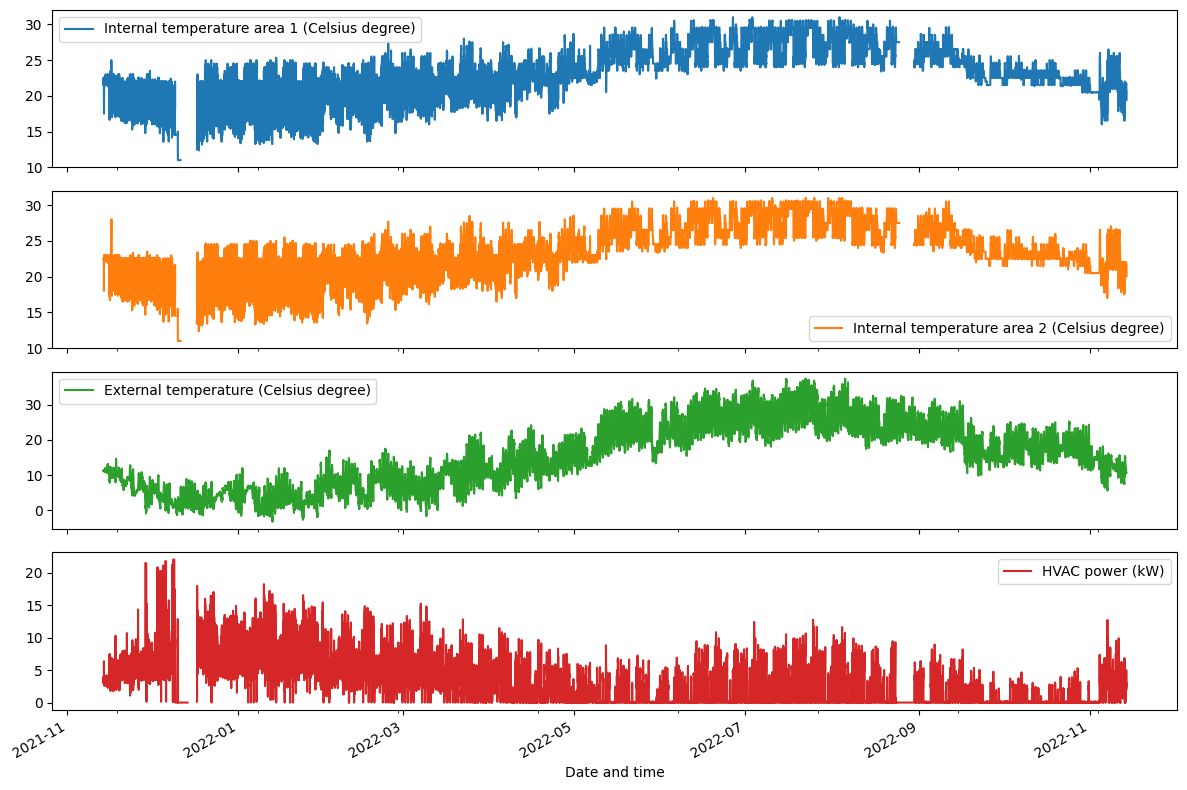

In [3]:
import matplotlib.pyplot as plt
df.set_index('Date and time', inplace=True)

# Plot the last 4 columns
df.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [13]:
df_ext[df_ext['External temperature (Celsius degree)'].isnull()]

,Date and time,External temperature (Celsius degree)
3707,2021-12-22 14:45:00,NaN
3708,2021-12-22 15:00:00,NaN
3709,2021-12-22 15:15:00,NaN
3710,2021-12-22 15:30:00,NaN
3711,2021-12-22 15:45:00,NaN
...,...,...
22409,2022-07-05 10:30:00,NaN
22410,2022-07-05 10:45:00,NaN
22411,2022-07-05 11:00:00,NaN
22412,2022-07-05 11:15:00,NaN


In [63]:
df_ext.to_csv('datasets/ext_5.csv', index=False)